In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import urllib.request, urllib.error, urllib.parse
import os
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions

# Extract flight information

In [21]:
#Get the URL
depart="MSP"
destination='CHI'
depart_date="2020-10-10"

url3="https://www.kayak.com/flights/"+ depart+"-"+ destination+ "/"+ depart_date+"?sort=bestflight_a"
print(url3)

https://www.kayak.com/flights/MSP-CHI/2020-10-10?sort=bestflight_a


In [22]:
DRIVER_PATH = '/Users/zhengjiaxin/Desktop/job/Previous_Projects/webscraping/chromedriver'

In [23]:
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
driver.get(url3)

In [24]:
soup=BeautifulSoup(driver.page_source, 'html')



In [25]:
departure = soup.find_all('span', attrs={'class': 'depart-time base-time'})
arrival= soup.find_all('span', attrs={'class': 'arrival-time base-time'})
pm_am = soup.find_all('span', attrs={'class': 'time-meridiem meridiem'})


deptime = []
for div in departure:
    deptime.append(div.getText()) 

arrtime = []
for div in arrival:
    arrtime.append(div.getText())  

meridiem = []
for div in pm_am:
    meridiem.append(div.getText())


meridiem = np.asarray(meridiem)
meridiem=meridiem.reshape(int(len(pm_am)/2),2)

meridiem

array([['am', 'pm'],
       ['am', 'am'],
       ['pm', 'pm'],
       ['pm', 'pm'],
       ['pm', 'pm'],
       ['pm', 'pm'],
       ['pm', 'pm'],
       ['am', 'am'],
       ['am', 'pm'],
       ['pm', 'pm'],
       ['am', 'am'],
       ['pm', 'pm'],
       ['am', 'pm'],
       ['am', 'pm'],
       ['am', 'pm']], dtype='<U2')

In [26]:
deptime

['10:39 ',
 '8:18 ',
 '8:24 ',
 '3:17 ',
 '3:00 ',
 '12:25 ',
 '12:56 ',
 '6:36 ',
 '11:42 ',
 '5:05 ',
 '6:12 ',
 '5:15 ',
 '9:15 ',
 '6:15 ',
 '8:10 ']

In [27]:
#air line info
airlines=soup.find_all('span', attrs={'class': 'providerName option-text'})
airline=[]
for div in airlines:
    airline.append(div.getText())
airline

['\nDelta\n',
 '\nDelta\n',
 '\nDelta\n',
 '\nDelta\n',
 '\nUnited Airlines\n',
 '\nAmerican Airlines\n',
 '\nDelta\n',
 '\nUnited Airlines\n',
 '\nUnited Airlines\n',
 '\nDelta\n',
 '\nAmerican Airlines\n',
 '\nUnited Airlines\n',
 '\nUnited Airlines\n',
 '\nWanderu\n',
 '\nDelta\n']

In [38]:
#price info
prices=soup.find_all('span', attrs={'class': 'price-text'})
#price=price[0:16]

price_list=[]
for price in prices:
    price_list.append(price.getText())
price_list

['$59',
 '$59',
 '$59',
 '$59',
 '$59',
 '$64',
 '$99',
 '$174',
 '$174',
 '$103',
 '$229',
 '$91',
 '$91',
 '$94',
 '$103']

In [44]:
df = pd.DataFrame({"origin" : depart,
                   "destination" : destination,
                   "startdate" : depart_date,
                   "deptime": [m+n for m, n in zip(deptime,meridiem[:,0])],
                   "arrtime": [m+n for m, n in zip(arrtime, meridiem[:,1])],
                   "airlines": airline,
                   "price": price_list
                   })

In [45]:
df

,origin,destination,startdate,deptime,arrtime,airlines,price
0,MSP,CHI,2020-10-10,10:39 am,12:00 pm,\nDelta\n,$59
1,MSP,CHI,2020-10-10,8:18 am,9:41 am,\nDelta\n,$59
2,MSP,CHI,2020-10-10,8:24 pm,9:48 pm,\nDelta\n,$59
3,MSP,CHI,2020-10-10,3:17 pm,4:41 pm,\nDelta\n,$59
4,MSP,CHI,2020-10-10,3:00 pm,4:35 pm,\nUnited Airlines\n,$59
5,MSP,CHI,2020-10-10,12:25 pm,2:04 pm,\nAmerican Airlines\n,$64
6,MSP,CHI,2020-10-10,12:56 pm,2:21 pm,\nDelta\n,$99
7,MSP,CHI,2020-10-10,6:36 am,8:10 am,\nUnited Airlines\n,$174
8,MSP,CHI,2020-10-10,11:42 am,1:20 pm,\nUnited Airlines\n,$174
9,MSP,CHI,2020-10-10,5:05 pm,8:52 pm,\nDelta\n,$103


In [46]:
# remove unwanted character from the airline column:

index=0                       #starting from index 0
for i in df["airlines"]:      #for every airline in the column,
    i=i[1:-1:1]               #use index to choose which letter to keep by using substring
    df["airlines"][index]=i   #assign the word to the index
    index+=1                  #index plus one

df

,origin,destination,startdate,deptime,arrtime,airlines,price
0,MSP,CHI,2020-10-10,10:39 am,12:00 pm,Delta,$59
1,MSP,CHI,2020-10-10,8:18 am,9:41 am,Delta,$59
2,MSP,CHI,2020-10-10,8:24 pm,9:48 pm,Delta,$59
3,MSP,CHI,2020-10-10,3:17 pm,4:41 pm,Delta,$59
4,MSP,CHI,2020-10-10,3:00 pm,4:35 pm,United Airlines,$59
5,MSP,CHI,2020-10-10,12:25 pm,2:04 pm,American Airlines,$64
6,MSP,CHI,2020-10-10,12:56 pm,2:21 pm,Delta,$99
7,MSP,CHI,2020-10-10,6:36 am,8:10 am,United Airlines,$174
8,MSP,CHI,2020-10-10,11:42 am,1:20 pm,United Airlines,$174
9,MSP,CHI,2020-10-10,5:05 pm,8:52 pm,Delta,$103


In [47]:
#remove unwanted character and change price from string to integer
df['price'] = df['price'].str.replace(r'\D', '').astype(int)


In [48]:
df

,origin,destination,startdate,deptime,arrtime,airlines,price
0,MSP,CHI,2020-10-10,10:39 am,12:00 pm,Delta,59
1,MSP,CHI,2020-10-10,8:18 am,9:41 am,Delta,59
2,MSP,CHI,2020-10-10,8:24 pm,9:48 pm,Delta,59
3,MSP,CHI,2020-10-10,3:17 pm,4:41 pm,Delta,59
4,MSP,CHI,2020-10-10,3:00 pm,4:35 pm,United Airlines,59
5,MSP,CHI,2020-10-10,12:25 pm,2:04 pm,American Airlines,64
6,MSP,CHI,2020-10-10,12:56 pm,2:21 pm,Delta,99
7,MSP,CHI,2020-10-10,6:36 am,8:10 am,United Airlines,174
8,MSP,CHI,2020-10-10,11:42 am,1:20 pm,United Airlines,174
9,MSP,CHI,2020-10-10,5:05 pm,8:52 pm,Delta,103


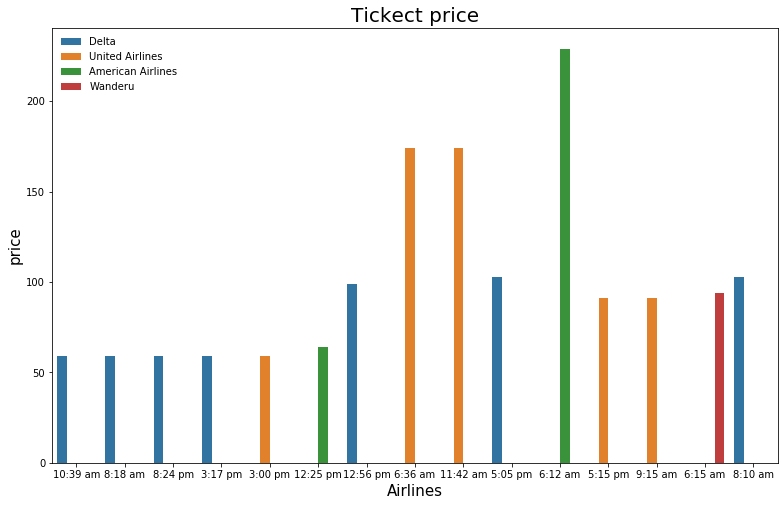

In [50]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,8))
sns.barplot(x="deptime", y='price', data=df, hue="airlines")
plt.xlabel("Airlines", fontsize=15)
plt.ylabel("price", fontsize=15)
plt.title("Tickect price", fontsize=20)
plt.legend(loc='upper left', frameon=False)

In [79]:
df.to_csv ('/Users/zhengjiaxin/Desktop/webscraping/flight_tickect.csv', 
           index = False, 
           header=True)
